# 综合案例-汽车销售数据分析

## 1.市场需求：各年度汽车总销量及环比，各车类、级别车辆销量及环比
## 2.消费能力、价位认知：车辆销售规模及环比、不同价位车辆销量及环比
## 3.企业/品牌竞争：车系、厂商、品牌销量及环比，市场占有率
## 4.热销车型 ：车型、车类、级别的销售top值

In [12]:
# 查看汽车数据，研究可以分析的维度

import pandas as pd
import numpy as np

sales=pd.read_csv('d:/aa/qc/car_selling.csv',encoding='gbk',index_col=0) #0列作为所有数据的索引   
#数据查看，预处理
sales.head()
type(sales['时间'][0])   # 时间系列中，元素本为字符串

sales['时间']=pd.to_datetime(sales['时间'])
type(sales['时间'][0])   # 将“时间”列改为时间戳，以便后续分析


sales['年份']=sales['时间'].dt.year  #以便后续分析环比数据（本期比上期）
sales['品牌'].unique()  #结果为去重数组
# '''array(['起亚', '丰田', '长安自主', '现代', '吉利', '比亚迪', '别克', '福特', '日产', '本田',
#        '斯柯达', '大众', '雪铁龙', '雪佛兰', '瑞虎', '荣威', '名爵', '领克', '捷途', '哈弗',
#        '传祺', '标致', '奔驰', '宝马', '宝骏', '奥迪', '马自达', '艾瑞泽', '凯迪拉克', 'WEY'],
#       dtype=object)'''

sales['城市'].unique()


# 增加档次列，对数据进行分箱
# pd.cut为分箱函数，其作用是将连续数据变为离散数据（等级数据）
# 将价格列均分为5等份，按从高到低列为['低档','中档','中高档','高档','豪华'] 5个档次 



sales.head(3)  #7700多行数据，时间跨度15.01~19.06

,车系,厂商,车类,品牌,车型,级别,价格,时间,销量,销售规模（亿）,省份,城市,年份
I8a8a4ca2016dfb9ffb9f77ba016e1155772543c7,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-06-30,2955,5.0235,江苏,盐城,2019
I8a8a4ca2016dfb9ffb9f77ba016e1155772843cc,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-05-31,5680,9.6560,江苏,盐城,2019
I8a8a4ca2016dfb9ffb9f77ba016e1155772a43d1,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-04-30,8707,14.8019,江苏,盐城,2019


In [13]:
sales['年份'].unique()

array([2019, 2018, 2017, 2016, 2015], dtype=int64)

In [14]:
# 1.拿出年份和销量两列，统计年度总销量并计算年份的环比值

sales_data=sales[['年份','销量']].groupby('年份').agg('sum')  #sales_data为只有“销量”一列的数据框，“年份”是索引

# 求增长量：
sales_data['diff']=sales_data.diff()  #差分函数，按设置的间隔，将当前列（行）与指定间隔行（列）做差,diff()等价diff(1)，表示相邻行
                   #diff(2) 表格隔一行，如3和1,5和3

sales_data

,销量,diff
年份,,
2015,14594487,NaN
2016,16952990,2358503.0
2017,17576436,623446.0
2018,17568751,-7685.0
2019,7464071,-10104680.0


In [15]:
# 思考：增长率应该怎么求

# 下面这句执行的结果，就是按行索引对应相除了 （能否达到要求？？）
# sales_data['diff'][1:] / sales_data['销量'][:-1]

lista = sales_data['diff'][1:]/ list(sales_data['销量'][:-1])

lista

年份
2016    0.161602
2017    0.036775
2018   -0.000437
2019   -0.575151
Name: diff, dtype: float64

In [16]:
sales_data['zzl'] = lista

In [17]:
sales_data

,销量,diff,zzl
年份,,,
2015,14594487,NaN,NaN
2016,16952990,2358503.0,0.161602
2017,17576436,623446.0,0.036775
2018,17568751,-7685.0,-0.000437
2019,7464071,-10104680.0,-0.575151


In [18]:
sales_data['环比增长率2'] = sales_data['销量'].pct_change()
sales_data

,销量,diff,zzl,环比增长率2
年份,,,,
2015,14594487,NaN,NaN,NaN
2016,16952990,2358503.0,0.161602,0.161602
2017,17576436,623446.0,0.036775,0.036775
2018,17568751,-7685.0,-0.000437,-0.000437
2019,7464071,-10104680.0,-0.575151,-0.575151


In [19]:
# 求15~19的环比增长率
import numpy as np






sales_data['环比增长率3']=sales_data['diff'][1:]/sales_data['销量'].shift(1) #shift()函数表示移动数据，不移动索引
#shift()等价shift(1)下移一行，shift(-1)上移一行，空白行用 nan 补位

sales_data  #得到年度销量及环比增长数据

,销量,diff,zzl,环比增长率2,环比增长率3
年份,,,,,
2015,14594487,NaN,NaN,NaN,NaN
2016,16952990,2358503.0,0.161602,0.161602,0.161602
2017,17576436,623446.0,0.036775,0.036775,0.036775
2018,17568751,-7685.0,-0.000437,-0.000437,-0.000437
2019,7464071,-10104680.0,-0.575151,-0.575151,-0.575151


## 插播：pct_change()

In [20]:
# 插播：pct_change()
df = pd.DataFrame({"A":[14, 4, 5, 4, 1, 55], 
                   "B":[5, 2, 54, 3, 2, 32],  
                   "C":[20, 20, 7, 21, 8, 5]})
df

,A,B,C
0,14,5,20
1,4,2,20
2,5,54,7
3,4,3,21
4,1,2,8
5,55,32,5


In [21]:
df.pct_change() # 等价于 df.pct_change(axis='index') # 默认行方向上的环比

#环比一定有空值，可以用0填充（不推荐），可以设定格式（推荐）
# df.pct_change().fillna(0).applymap(lambda x: format(x,".2%"))

,A,B,C
0,NaN,NaN,NaN
1,-0.714286,-0.600000,0.000000
2,0.250000,26.000000,-0.650000
3,-0.200000,-0.944444,2.000000
4,-0.750000,-0.333333,-0.619048
5,54.000000,15.000000,-0.375000


In [22]:
df.pct_change(axis='columns') #列方向的环比

,A,B,C
0,NaN,-0.642857,3.00000
1,NaN,-0.500000,9.00000
2,NaN,9.800000,-0.87037
3,NaN,-0.250000,6.00000
4,NaN,1.000000,3.00000
5,NaN,-0.418182,-0.84375


In [23]:
#思考：同比数据怎么算？（只要16,17,18三年数据）

#1.设置年月索引，取出时间和销量两列，且只要16,17,18三年数据
sales1=sales[['时间','销量']][(sales['年份']>2015)&(sales['年份']<2019)] 
sales1['年月索引'] = pd.PeriodIndex(sales1['时间'],freq='m')
sales1_data=sales1[['年月索引','销量']].groupby('年月索引').agg('sum')
sales1_data['环比增长率'] = sales1_data['销量'].pct_change(periods=12)
sales1_data


,销量,环比增长率
年月索引,,
2016-01,1504745,NaN
2016-02,914728,NaN
2016-03,1400538,NaN
2016-04,1216282,NaN
2016-05,1234913,NaN
2016-06,1248621,NaN
2016-07,1140831,NaN
2016-08,1295074,NaN
2016-09,1628209,NaN


In [24]:
sales1=sales[['时间','销量']][(sales['年份']>2015)&(sales['年份']<2019)] 
sales1['年月索引'] = pd.PeriodIndex(sales1['时间'],freq='m')
sales1_data=sales1[['年月索引','销量']].groupby('年月索引').agg('sum')

In [25]:
sales1

,时间,销量,年月索引
I8a8a4ca2016dfb9ffb9f77ba016e1155773343e5,2018-12-31,12726,2018-12
I8a8a4ca2016dfb9ffb9f77ba016e1155773643ea,2018-11-30,11536,2018-11
I8a8a4ca2016dfb9ffb9f77ba016e1155773843ef,2018-10-31,8881,2018-10
I8a8a4ca2016dfb9ffb9f77ba016e1155773a43f4,2018-09-30,9699,2018-09
I8a8a4ca2016dfb9ffb9f77ba016e1155773c43f9,2018-08-31,8121,2018-08
...,...,...,...
I8a8a4ca2016dfb9ffb9f77ba016e1155d3b94eb9,2016-05-31,2675,2016-05
I8a8a4ca2016dfb9ffb9f77ba016e1155d3be4ebe,2016-04-30,2258,2016-04
I8a8a4ca2016dfb9ffb9f77ba016e1155d3c34ec3,2016-03-31,2376,2016-03
I8a8a4ca2016dfb9ffb9f77ba016e1155d3c74ec8,2016-02-28,1841,2016-02


In [26]:
# type(sales1_data['销量'].to_timestamp().year)
# sales1_data.index.to_timestamp().year
sales1_data.index.year.unique()  #取出索引中的年份

Int64Index([2016, 2017, 2018], dtype='int64', name='年月索引')

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

#【思考】取出2016~2018三年份数据，以季度为单位。画出三年4个季度的簇状柱形图

sales2=sales[['时间','销量']][ (sales['年份'] > 2015) & (sales['年份']< 2019) ]

# 获取季度信息
sales2['季度']=pd.PeriodIndex(sales1['时间'],freq='q')
sales2_data=sales2[['季度','销量']].groupby('季度').agg('sum')
sales2_data = (sales2_data/10000).round(1)
sales2_data

,销量
季度,
2016Q1,382.0
2016Q2,370.0
2016Q3,406.4
2016Q4,536.9
2017Q1,414.5
2017Q2,370.3
2017Q3,434.2
2017Q4,538.7
2018Q1,449.4


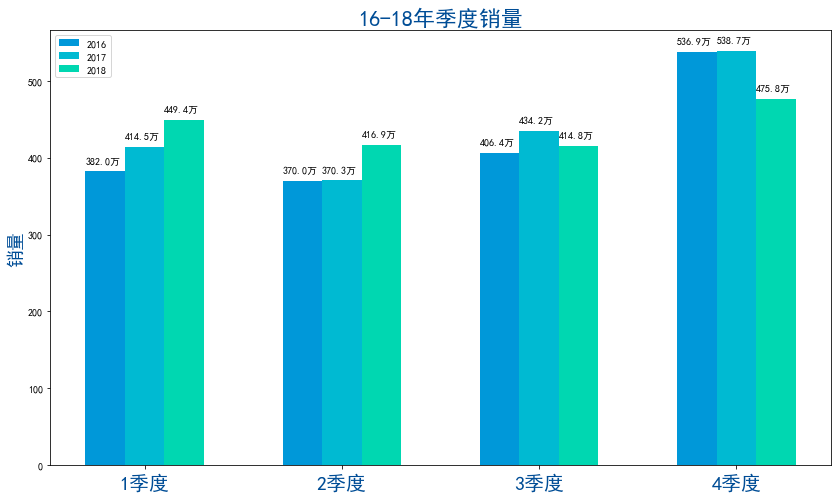

In [29]:
#1.画出横坐标为季度，纵坐标为销量的簇状柱形图

# 每一簇里面是三个年份的销量

plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
plt.figure(figsize=(14, 8))              #默认单位为英寸


#第一张图
#配色网：https://mycolor.space/
# peise=['#00C9A7', '#D3EAEC', '#ADC5CF']  #三个色系代表三个年份

peise=['#0098D9', '#00BAD2', '#00D7B1']  #三个色系代表三个年份

x=np.array([0,2,4,6])  #四个簇
y=sales2_data['销量']
bar_width=0.4

for i in range(3):
    plt.bar(x+i*bar_width,sales2_data['销量'][i*4:i*4+4], color=peise[i],width=bar_width)

xlist=['1季度','2季度','3季度','4季度']
plt.xticks(x+bar_width, xlist, color='#004D96', fontsize=20)  # x轴刻度说明，plt.xticks(x轴刻度位置，刻度名称，文字属性)

plt.ylabel('销量', fontsize=18,color='#004D96')


 # 【思考】为每个柱形加上数据标签
for i in range(3):
    for j in range(4):
        plt.text(x[j]+i*bar_width-0.2,sales2_data['销量'][i*4+j]+10,"{:.1f}万".format(sales2_data['销量'][i*4+j]))

plt.title('16-18年季度销量', fontsize=22,color='#004D96')     
plt.legend(sales1_data.index.year.unique(),loc='upper left')

plt.show()


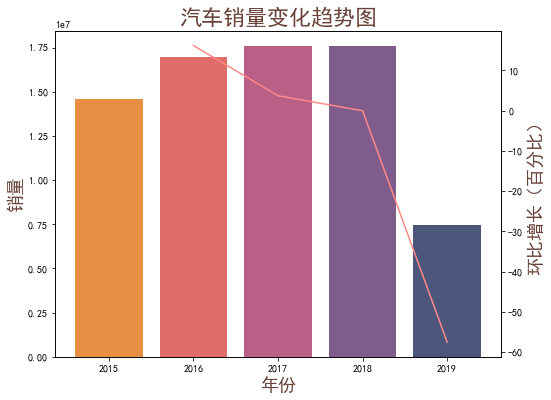

In [30]:
import matplotlib.pyplot as plt

#2 画图： 汽车销量趋势图：销量作柱形图，环比增长率做折线图，放入一个双y轴图中

def yyplot(x1=None, y1=None, x2=None, y2=None, ylabel='环比增长（百分比）', title='汽车销量变化趋势图'):         # 双Y轴图形绘制
    plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
    plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
    fig = plt.figure(figsize=(8, 6))              #默认单位为英寸

    ax1 = fig.add_subplot(111)          # 添加第一张子图，111表示把原图分为1*1，子图在第一块区域
    #如改为：221，则表示原图分为2*2，子图占左上第一块区域
    
    #配色网：https://mycolor.space/
    #第一张图
    ax1.bar(x1, y1, color=['#E98F44', '#E16D6A', '#BA5F86', '#805C8D', '#4B567A'])

    ax1.set_ylabel('销量', fontsize=18,color='#694339')              # Y轴标题
    ax1.set_xlabel('年份', fontsize=18,color='#694339')              # x轴标题
    ax1.set_title(title, fontsize=22,color='#694339')                # 标题

    ax2 = ax1.twinx()                                # 共用x轴，Y轴显示不同
    ax2.plot(x2, y2, '#FF8888')                      # 折线图（x2年份，y2环比增长率）
    ax2.set_ylabel(ylabel, fontsize=18,color='#694339')
    plt.xticks(x1, x1, fontsize=18,color='#694339')  # x轴刻度
    plt.show()


yyplot(sales_data.index,sales_data['销量'],sales_data.index,sales_data['zzl']*100) #调用函数


In [31]:
#3.各类型车辆在各年份的销量情况（2015~2019年）
#  建立透视表，并绘相应柱状图


leibie = pd.pivot_table(sales, index='车类',columns='年份',values='销量',  
                        aggfunc={'销量':np.sum})

leibie
# leibie.index

年份,2015,2016,2017,2018,2019
车类,,,,,
MPV,409042,474380,442669,561307,215394
SUV,4821500,6058928,6871876,7111774,3094016
轿车,9363945,10419682,10261891,9895670,4154661


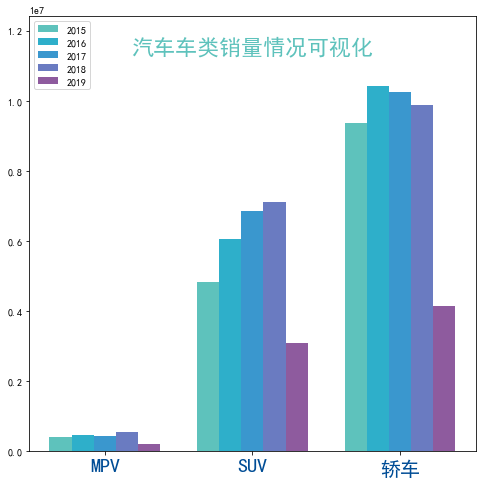

In [42]:
#4.定义多系列柱形图
#table：接受透视表，透视表的一行为柱形图的一个簇，列为一个系列柱
#x：接受数组，为每个簇的起点x坐标，本例x=np.array([0, 2, 4])#是x的起点位置
#colors:接受列表，为每个柱子的颜色
#title：接受字符串，为图形标题


def mybar(table=None,  x=None , bar_width=0.3, colors=None , title=None, xlist=None):
    
    plt.figure(figsize=(8, 8))       # 画布尺寸    
    
    cols = table.columns             # 取出表中所有列（一列就是一个色柱）
        
    top = table.values.max()         # 取出表格数据的最大值,供设定坐标轴范围
    
    # 请补充该函数
    for i in range(5):
        plt.bar(x+i*bar_width,table[cols[i]], color=colors[i],width=bar_width)
    plt.ylim(0.0,top+0.2*1e7)
    plt.title(title, fontsize=22,color='#5EC2BC',x=0.5, y=0.9) 
    plt.legend(cols,loc='upper left')
    
    plt.xticks(x+2*bar_width, xlist, color='#004D96', fontsize=20)
    plt.show()
    

    
    
t1='汽车车类销量情况可视化'
peise = ['#5EC2BC', '#2EAFCA', '#3A97CE', '#6A7BC1', '#8E5B9E']    # 各年份柱子的颜色，5个年份，5个颜色
mybar(table=leibie,x=np.array([0, 2, 4]),title=t1,colors=peise, xlist=['MPV','SUV','轿车'])

In [38]:
# 将价格列均分为5等份，按从高到低列为['低档','中档','中高档','高档','豪华'] 5个档次 
sales['档次'] = pd.cut(sales['价格'], 5,labels=['低档','中档','中高档','高档','豪华'])
sales

,车系,厂商,车类,品牌,车型,级别,价格,时间,销量,销售规模（亿）,省份,城市,年份,档次
I8a8a4ca2016dfb9ffb9f77ba016e1155772543c7,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-06-30,2955,5.0235,江苏,盐城,2019,中档
I8a8a4ca2016dfb9ffb9f77ba016e1155772843cc,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-05-31,5680,9.6560,江苏,盐城,2019,中档
I8a8a4ca2016dfb9ffb9f77ba016e1155772a43d1,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-04-30,8707,14.8019,江苏,盐城,2019,中档
I8a8a4ca2016dfb9ffb9f77ba016e1155772d43d6,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-03-31,13989,23.7813,江苏,盐城,2019,中档
I8a8a4ca2016dfb9ffb9f77ba016e1155772f43db,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-02-28,7360,12.5120,江苏,盐城,2019,中档
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I8a8a4ca2016dfb9ffb9f77ba016e1155d3c74ec8,美系,上汽通用,轿车,凯迪拉克,ATS-L,中型,36,2016-02-28,1841,6.6276,上海,上海,2016,中高档
I8a8a4ca2016dfb9ffb9f77ba016e1155d3cc4ecd,美系,上汽通用,轿车,凯迪拉克,ATS-L,中型,36,2016-01-31,2944,10.5984,上海,上海,2016,中高档
I8a8a4ca2016dfb9ffb9f77ba016e1155d3d14ed2,美系,上汽通用,轿车,凯迪拉克,ATS-L,中型,36,2015-03-31,3592,12.9312,上海,上海,2015,中高档
I8a8a4ca2016dfb9ffb9f77ba016e1155d3d64ed7,美系,上汽通用,轿车,凯迪拉克,ATS-L,中型,36,2015-02-28,2138,7.6968,上海,上海,2015,中高档


In [39]:
# 按档次统计销售额

dangci= pd.pivot_table(sales, index='档次',columns='年份',values='销量',  
                        aggfunc={'销量':np.sum})
dangci

年份,2015,2016,2017,2018,2019
档次,,,,,
低档,9342714,11471026,11462927,11275949,4704832
中档,3146435,3417653,3734978,3788804,1621108
中高档,722252,1163153,1276544,1266065,529846
高档,449143,527120,672305,803842,417268
豪华,933943,374038,429682,434091,191017


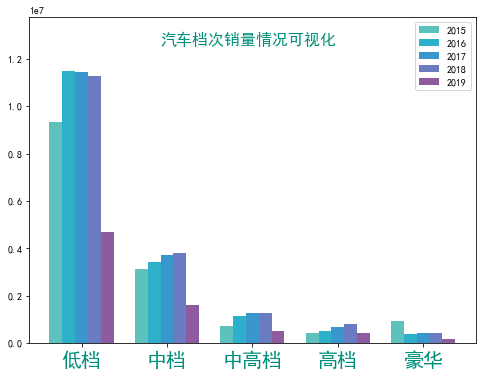

In [173]:
t1='汽车档次销量情况可视化'
peise = ['#5EC2BC', '#2EAFCA', '#3A97CE', '#6A7BC1', '#8E5B9E']    # 各年份柱子的颜色，5个年份，5个颜色
mybar(table=dangci,x=np.array([0, 2, 4, 6, 8]),title=t1,colors=peise) #此时变为5行，x列表长度也要对应变为5个起点

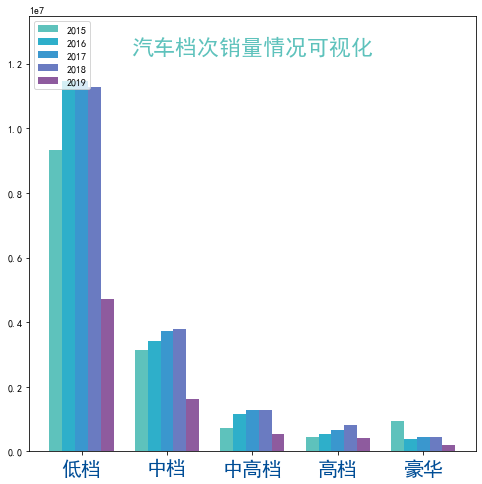

In [43]:
t1='汽车档次销量情况可视化'
peise = ['#5EC2BC', '#2EAFCA', '#3A97CE', '#6A7BC1', '#8E5B9E']    # 各年份柱子的颜色，5个年份，5个颜色
mybar(table=dangci,x=np.array([0, 2, 4, 6, 8]),title=t1,colors=peise,xlist=['低档','中档','中高档','高档','豪华']) #此时变为5行，x列表长度也要对应变为5个起点

In [18]:
# 【练习】热销品牌top5统计
  


年份,2015,2016,2017,2018,2019
品牌,,,,,
WEY,0,0,86427,129136,36464
丰田,1444765,1023765,1125264,1245569,644532
传祺,129082,335912,457208,465826,146921
凯迪拉克,53086,105702,165532,219531,113519
别克,952201,1150190,1064685,862599,355131
吉利,0,669723,1176068,1316884,543035
名爵,0,0,7313,217618,93832
哈弗,616267,895744,776052,715279,340795
大众,2618420,2964571,3082742,3075075,1370120


In [159]:
# 【练习】热销品牌top5统计
t1 = pd.pivot_table(sales, index='品牌',columns='年份',values='销量',  
                        aggfunc={'销量':np.sum})
t2 = t1.isnull()

In [160]:
for i in t1.index:
    for j in t1.columns:
        if t2.loc[i,j]:
            t1.loc[i,j] = 0

In [164]:
for i in t1.columns:
    t1[i] = t1[i].astype(int)

In [165]:
t1

年份,2015,2016,2017,2018,2019
品牌,,,,,
WEY,0,0,86427,129136,36464
丰田,1444765,1023765,1125264,1245569,644532
传祺,129082,335912,457208,465826,146921
凯迪拉克,53086,105702,165532,219531,113519
别克,952201,1150190,1064685,862599,355131
吉利,0,669723,1176068,1316884,543035
名爵,0,0,7313,217618,93832
哈弗,616267,895744,776052,715279,340795
大众,2618420,2964571,3082742,3075075,1370120


品牌
大众    2618420
丰田    1444765
本田    1058246
现代    1028391
别克     952201
Name: 2015, dtype: int64
品牌
大众    2964571
别克    1150190
本田    1129075
现代    1100731
丰田    1023765
Name: 2016, dtype: int64
品牌
大众    3082742
本田    1348841
吉利    1176068
丰田    1125264
别克    1064685
Name: 2017, dtype: int64
品牌
大众    3075075
本田    1406411
吉利    1316884
丰田    1245569
日产    1086329
Name: 2018, dtype: int64
品牌
大众    1370120
本田     726226
丰田     644532
吉利     543035
日产     483827
Name: 2019, dtype: int64


In [169]:
for i in t1.columns:
    t3 = t1[i]
    t3 = t3.sort_values(ascending=False)
    print(t3.head(5))

品牌
大众    2618420
丰田    1444765
本田    1058246
现代    1028391
别克     952201
Name: 2015, dtype: int32
品牌
大众    2964571
别克    1150190
本田    1129075
现代    1100731
丰田    1023765
Name: 2016, dtype: int32
品牌
大众    3082742
本田    1348841
吉利    1176068
丰田    1125264
别克    1064685
Name: 2017, dtype: int32
品牌
大众    3075075
本田    1406411
吉利    1316884
丰田    1245569
日产    1086329
Name: 2018, dtype: int32
品牌
大众    1370120
本田     726226
丰田     644532
吉利     543035
日产     483827
Name: 2019, dtype: int32


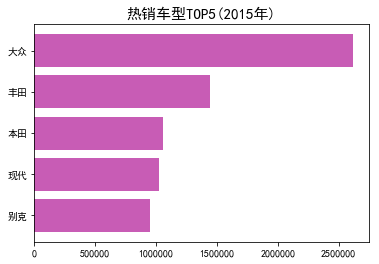

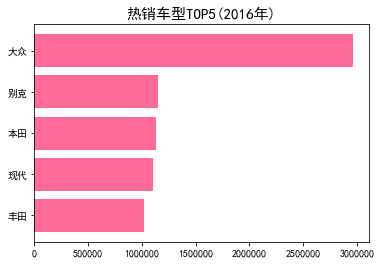

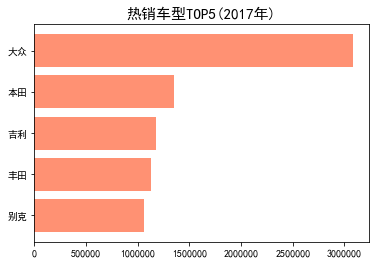

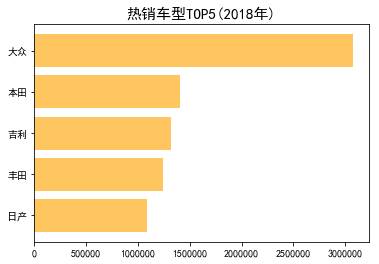

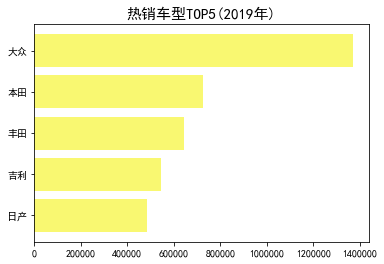

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示


peise=['#C85CB5','#FF6A96','#FF9173','#FFC55F','#F9F871']
for i in range(2015, 2020): #连续画5个柱形图
    plt.figure()     # 新建画布
    t5 = tops[i].sort_values(ascending=True)[-5:]       # 统计排序，取出排名前5的车型
    plt.barh(t5.index, t5, color=peise[i-2015])                  # 绘制柱状图
    plt.title('热销车型TOP5({}年)'.format(i), fontsize=15)   # 设置标题

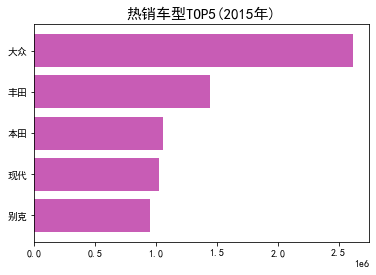

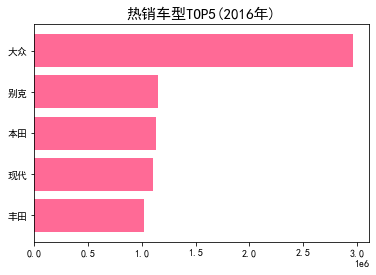

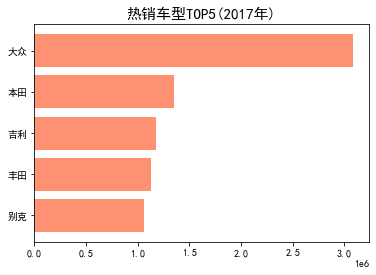

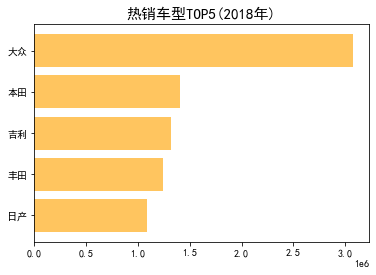

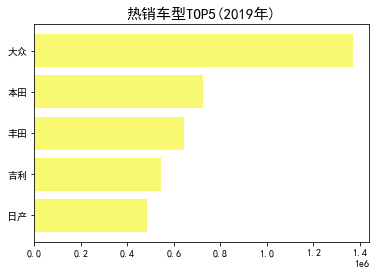

In [167]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示


peise=['#C85CB5','#FF6A96','#FF9173','#FFC55F','#F9F871']
for i in range(2015, 2020): #连续画5个柱形图
    plt.figure()     # 新建画布
    t5 = t1[i].sort_values(ascending=True)[-5:]       # 统计排序，取出排名前5的车型
    plt.barh(t5.index, t5, color=peise[i-2015])                  # 绘制柱状图
    plt.title('热销车型TOP5({}年)'.format(i), fontsize=15)   # 设置标题